# Global Terrorism exploration and prediction APP

## Dataset

The Global Terrorism Database (GTD) documents more than 200,000 international and domestic terrorist attacks that occurred worldwide since 1970. With details on various dimensions of each attack, the GTD familiarizes analysts, policymakers, scholars, and journalists with patterns of terrorism. The GTD defines terrorist attacks as: The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation. Data collection is ongoing and updates are published annually at www.start.umd.edu/gtd.

This dataset is available: https://www.kaggle.com/START-UMD/gtd/data, in the document called: <b>globalterrorismdb_0718dist.csv </b>


## Project Goals

The goal of the project is to understand more about the global terrorism, using an exploration app in streamlit that allow to understand better the terrorism in each country: terrorist groups, attacks, more dangerous cities, most frequent acts of terror // Increase to..do//

Having a good approach about the trends during all the period (1970 til.2017) like, if the terrorist attacks are increasing or decreasing... what kind of terrorist atacks are being on trend.... can we predict which region or regions will have a terrorist attack and which kind? can we predict the number of victims?

//Increase to..do//

## Importing Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


## Importing data

In [2]:
df = pd.read_csv("global_terror.csv",encoding="ISO-8859-1")

C:\Users\APC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Data Cleaning

In [5]:
df = df[['iyear','imonth','iday','country_txt','country','region_txt',
         'region','provstate','city',
         'latitude', 'longitude','success','suicide', 'attacktype1_txt',
         'attacktype1', 'targtype1_txt', 'targtype1',
         'gname', 'weaptype1_txt','weaptype1',
         'nkill','nwound']]

In [6]:
df.head()

,iyear,imonth,iday,country_txt,country,region_txt,region,provstate,city,latitude,...,suicide,attacktype1_txt,attacktype1,targtype1_txt,targtype1,gname,weaptype1_txt,weaptype1,nkill,nwound
0,1970,7,2,Dominican Republic,58,Central America & Caribbean,2,NaN,Santo Domingo,18.456792,...,0,Assassination,1,Private Citizens & Property,14,MANO-D,Unknown,13,1.0,0.0
1,1970,0,0,Mexico,130,North America,1,Federal,Mexico city,19.371887,...,0,Hostage Taking (Kidnapping),6,Government (Diplomatic),7,23rd of September Communist League,Unknown,13,0.0,0.0
2,1970,1,0,Philippines,160,Southeast Asia,5,Tarlac,Unknown,15.478598,...,0,Assassination,1,Journalists & Media,10,Unknown,Unknown,13,1.0,0.0
3,1970,1,0,Greece,78,Western Europe,8,Attica,Athens,37.997490,...,0,Bombing/Explosion,3,Government (Diplomatic),7,Unknown,Explosives,6,NaN,NaN
4,1970,1,0,Japan,101,East Asia,4,Fukouka,Fukouka,33.580412,...,0,Facility/Infrastructure Attack,7,Government (Diplomatic),7,Unknown,Incendiary,8,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   country          181691 non-null  int64  
 5   region_txt       181691 non-null  object 
 6   region           181691 non-null  int64  
 7   provstate        181270 non-null  object 
 8   city             181257 non-null  object 
 9   latitude         177135 non-null  float64
 10  longitude        177134 non-null  float64
 11  success          181691 non-null  int64  
 12  suicide          181691 non-null  int64  
 13  attacktype1_txt  181691 non-null  object 
 14  attacktype1      181691 non-null  int64  
 15  targtype1_txt    181691 non-null  object 
 16  targtype1        181691 non-null  int6

In [8]:
df.isnull().sum()

iyear                  0
imonth                 0
iday                   0
country_txt            0
country                0
region_txt             0
region                 0
provstate            421
city                 434
latitude            4556
longitude           4557
success                0
suicide                0
attacktype1_txt        0
attacktype1            0
targtype1_txt          0
targtype1              0
gname                  0
weaptype1_txt          0
weaptype1              0
nkill              10313
nwound             16311
dtype: int64

In [9]:
df['iday'].value_counts()
df['iday'].replace(to_replace=0, value=np.random.randint(1, 29), inplace=True)
df['iday'].value_counts()

10    6955
15    6500
1     6344
4     6153
16    6112
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
Name: iday, dtype: int64

In [10]:
df['imonth'].value_counts()
df['imonth'].replace(to_replace=0, value=np.random.randint(1, 13), inplace=True)
df['imonth'].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13516
Name: imonth, dtype: int64

In [11]:
df2 = df[["iyear", "imonth", "iday"]].copy()
df2.columns = ["year", "month", "day"]
pd.to_datetime(df2)
df["idate"] = pd.to_datetime(df2)
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df

,idate,iyear,imonth,iday,country_txt,country,region_txt,region,provstate,city,...,suicide,attacktype1_txt,attacktype1,targtype1_txt,targtype1,gname,weaptype1_txt,weaptype1,nkill,nwound
0,1970-07-02,1970,7,2,Dominican Republic,58,Central America & Caribbean,2,NaN,Santo Domingo,...,0,Assassination,1,Private Citizens & Property,14,MANO-D,Unknown,13,1.0,0.0
1,1970-12-10,1970,12,10,Mexico,130,North America,1,Federal,Mexico city,...,0,Hostage Taking (Kidnapping),6,Government (Diplomatic),7,23rd of September Communist League,Unknown,13,0.0,0.0
2,1970-01-10,1970,1,10,Philippines,160,Southeast Asia,5,Tarlac,Unknown,...,0,Assassination,1,Journalists & Media,10,Unknown,Unknown,13,1.0,0.0
3,1970-01-10,1970,1,10,Greece,78,Western Europe,8,Attica,Athens,...,0,Bombing/Explosion,3,Government (Diplomatic),7,Unknown,Explosives,6,NaN,NaN
4,1970-01-10,1970,1,10,Japan,101,East Asia,4,Fukouka,Fukouka,...,0,Facility/Infrastructure Attack,7,Government (Diplomatic),7,Unknown,Incendiary,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017-12-31,2017,12,31,Somalia,182,Sub-Saharan Africa,11,Middle Shebelle,Ceelka Geelow,...,0,Armed Assault,2,Military,4,Al-Shabaab,Firearms,5,1.0,2.0
181687,2017-12-31,2017,12,31,Syria,200,Middle East & North Africa,10,Lattakia,Jableh,...,0,Bombing/Explosion,3,Military,4,Muslim extremists,Explosives,6,2.0,7.0
181688,2017-12-31,2017,12,31,Philippines,160,Southeast Asia,5,Maguindanao,Kubentog,...,0,Facility/Infrastructure Attack,7,Private Citizens & Property,14,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,8,0.0,0.0
181689,2017-12-31,2017,12,31,India,92,South Asia,6,Manipur,Imphal,...,0,Bombing/Explosion,3,Government (General),2,Unknown,Explosives,6,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idate            181691 non-null  datetime64[ns]
 1   iyear            181691 non-null  int64         
 2   imonth           181691 non-null  int64         
 3   iday             181691 non-null  int64         
 4   country_txt      181691 non-null  object        
 5   country          181691 non-null  int64         
 6   region_txt       181691 non-null  object        
 7   region           181691 non-null  int64         
 8   provstate        181270 non-null  object        
 9   city             181257 non-null  object        
 10  latitude         177135 non-null  float64       
 11  longitude        177134 non-null  float64       
 12  success          181691 non-null  int64         
 13  suicide          181691 non-null  int64         
 14  attacktype1_txt  181

In [13]:
## As we see there are missing values in columns nkill nwound, as the amount of
## missing values are more than 8%, we could not proceed removing those rows with mising values in both columns 
## so we will substitute those values with a average data so we will not affect to our training data

df['nkill'].fillna((df['nkill'].mean()), inplace=True)
df['nwound'].fillna((df['nwound'].mean()), inplace=True)

In [14]:
df["nkill"] = df["nkill"].astype(int)
df["nwound"] = df["nwound"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idate            181691 non-null  datetime64[ns]
 1   iyear            181691 non-null  int64         
 2   imonth           181691 non-null  int64         
 3   iday             181691 non-null  int64         
 4   country_txt      181691 non-null  object        
 5   country          181691 non-null  int64         
 6   region_txt       181691 non-null  object        
 7   region           181691 non-null  int64         
 8   provstate        181270 non-null  object        
 9   city             181257 non-null  object        
 10  latitude         177135 non-null  float64       
 11  longitude        177134 non-null  float64       
 12  success          181691 non-null  int64         
 13  suicide          181691 non-null  int64         
 14  attacktype1_txt  181

In [15]:
df.to_csv("Terrorism_preprocessed.csv",index=False)

In [19]:
#With regards to the rows with no information in latitude and longitud, there are 4557 rows over 181691, this means a 2.5% or our data set.
#from those rows 2295 the city or provstate is unknown, 
df = df.dropna(subset=['longitude'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177134 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idate            177134 non-null  datetime64[ns]
 1   iyear            177134 non-null  int64         
 2   imonth           177134 non-null  int64         
 3   iday             177134 non-null  int64         
 4   country_txt      177134 non-null  object        
 5   country          177134 non-null  int64         
 6   region_txt       177134 non-null  object        
 7   region           177134 non-null  int64         
 8   provstate        176725 non-null  object        
 9   city             176708 non-null  object        
 10  latitude         177134 non-null  float64       
 11  longitude        177134 non-null  float64       
 12  success          177134 non-null  int64         
 13  suicide          177134 non-null  int64         
 14  attacktype1_txt  177

In [20]:
df2 = df[df["provstate"].isnull()]
df2[df2["city"].isnull()]

,idate,iyear,imonth,iday,country_txt,country,region_txt,region,provstate,city,...,suicide,attacktype1_txt,attacktype1,targtype1_txt,targtype1,gname,weaptype1_txt,weaptype1,nkill,nwound


In [21]:
df3 = df[df["city"].isnull()]
df3[df3["provstate"].isnull()]

,idate,iyear,imonth,iday,country_txt,country,region_txt,region,provstate,city,...,suicide,attacktype1_txt,attacktype1,targtype1_txt,targtype1,gname,weaptype1_txt,weaptype1,nkill,nwound


In [ ]:
##THIS MEANS THAT when the city is non value the provstate has value and the contrary also happens, so no cleaning is need it

In [22]:
df.to_csv("Terrorism_clean_dataset.csv",index=False)

## Exploring data

### Visualization of outliers 

An outlier is a data point that lies outside the overall pattern in a distribution. A commonly used rule says that a data point is an outlier if it is more than 1.5 IQR above the third quartile or below the first quartile. Said differently, low outliers are below Q1 -1.5 * IQR  and high outliers are above Q3 +1.5 IQR


<AxesSubplot:>

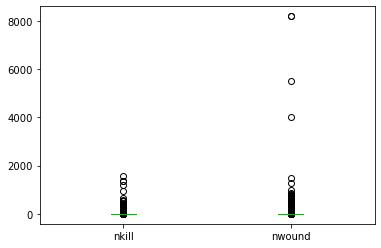

In [27]:
df[['nkill', 'nwound']].plot.box()

In [26]:
# Looking for outliers
df[['nkill', 'nwound']].describe()

,nkill,nwound
count,177134.000000,177134.000000
mean,2.341628,3.177967
std,11.158855,34.712222
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,3.000000
max,1570.000000,8191.000000


In [47]:
#Function to show outliers using the 1.5 IQR method 
#IQR = Q3 - Q1
    # lower outliers are below  Q1 - 1.5 * IQR  
    # Higher ouliers  are above  Q3 + 1.5 * IQR 
    
a = np.array(df.nkill)
upper_quartile = np.percentile(a, 75)
lower_quartile = np.percentile(a, 25)
iqr15 = (upper_quartile - lower_quartile) * 1.5
quartile_set = (lower_quartile - iqr15, upper_quartile + iqr15)
quartile_set

(-3.0, 5.0)

## Trend analysis (Goal 1) (to-DO)

C:\Users\APC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Count')

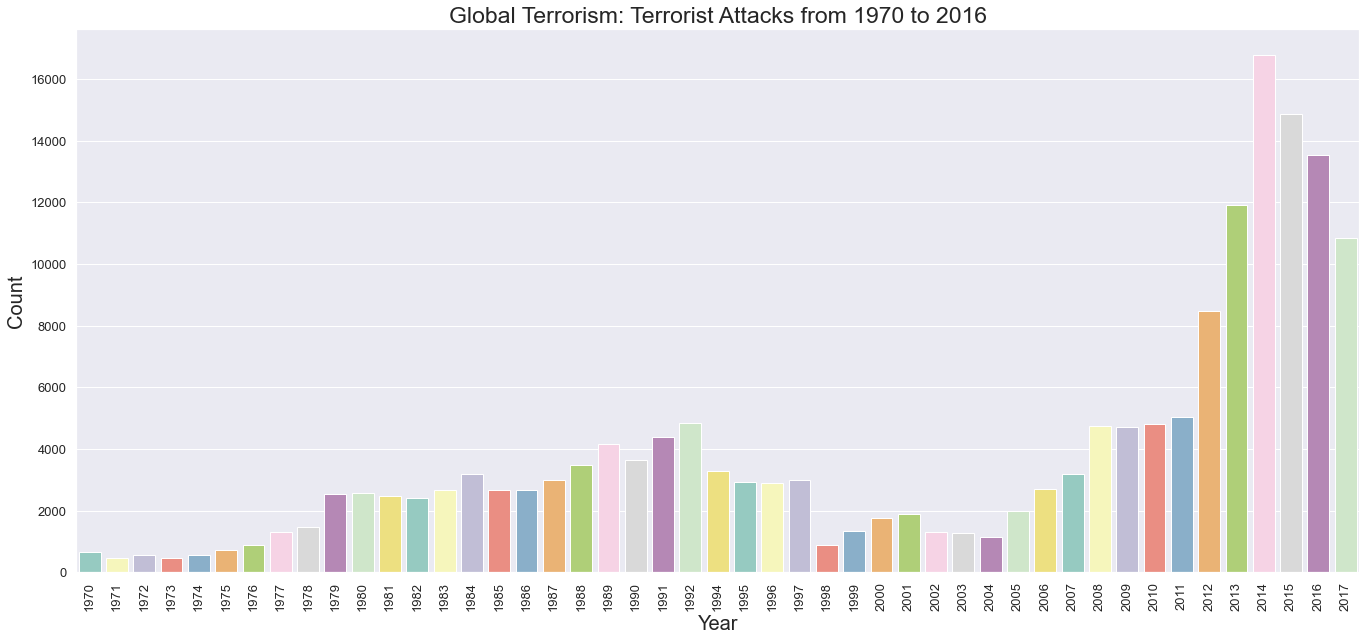

In [55]:
# Plot with the Terrorist Attacks from 1970 to 2016
sns.set_theme(style="darkgrid")
plt.figure(figsize=(23, 10))
sns.countplot('iyear', data=df, palette="Set3")
plt.title('Global Terrorism: Terrorist Attacks from 1970 to 2016', fontsize=23)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Count', fontsize=20)